In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt

In [2]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self):
        self.data = "data/captcha"
        self.data = torchvision.datasets.ImageFolder(root=self.data, transform=torchvision.transforms.Compose([
            torchvision.transforms.Grayscale(num_output_channels=1),
            torchvision.transforms.Resize(64),
            torchvision.transforms.ToTensor()
        ]))
        self.imgs = self.data.imgs
        
        # Name of file
        self.labels = [img[0].split("/")[-1].split(".")[0] for img in self.imgs]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index][0], self.labels[index]

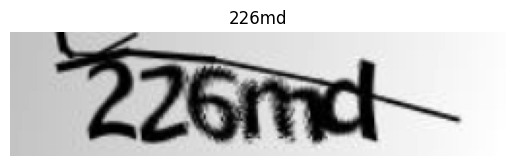

In [3]:
plt.imshow(Dataset()[0][0].squeeze(0), cmap="gray")
plt.title(Dataset()[0][1])
plt.axis("off")
plt.show()

In [4]:
dataset = Dataset()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True)

In [5]:
def encode(string: list) -> torch.tensor:
    result = []
    for char in string:
        result.append([ord(c) for c in char])
    return torch.tensor(result)


def decode(tensor: torch.tensor) -> list:
    result = []
    for char in tensor:
        result.append("".join([chr(c) for c in char]))
    return result

In [22]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.features = nn.Sequential(
            nn.Linear(64 * 256, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 5)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.features(x)
        x = F.sigmoid(x) * 256
        return x
    
model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [23]:
from tqdm.notebook import tqdm

In [27]:
pbar = tqdm(dataloader, total=len(dataloader), desc="Training", unit="batch")
for x, y in pbar:
    y = encode(y).float()

    optimizer.zero_grad()
    y_pred = model(x)
    print(y_pred.requires_grad)
    l = F.mse_loss(y_pred, y)
    l.backward()
    optimizer.step()

    pbar.set_postfix(loss=l.item())

Training:   0%|          | 0/9 [00:00<?, ?batch/s]

True
True
True
True
True
True
True
True
True
